文字探勘

In [1]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
import re
from collections import Counter

In [5]:
# 讀取從 pandas 來的結構化資料，但內文的句子尚未擷取出合適斷詞
orgdata = pd.read_csv('textmining_0323.csv', encoding = "UTF-8")

FileNotFoundError: [Errno 2] No such file or directory: 'textmining_0323.csv'

In [4]:
orgdata.head()

,TITLE
0,$BLUR 兩週下跌逾 43.9%！分析師：第二季空投或有更大拋壓
1,1200 架，美軍首度公布 NGAD 採購數量
2,14萬枚比特幣清償》Mt.Gox 債權人如何索賠、2種方案選擇差異？
3,14萬枚比特幣賣壓》Mt.Gox最大債權人將「先倒貨三成」，剩七成續抱觀望
4,14萬比特幣拋壓再延》Mt.Gox(門頭溝)債權人還款截止日延至 1031


In [5]:
orgdata['seg'] = ""
orgdata.head()

,TITLE,seg
0,$BLUR 兩週下跌逾 43.9%！分析師：第二季空投或有更大拋壓,
1,1200 架，美軍首度公布 NGAD 採購數量,
2,14萬枚比特幣清償》Mt.Gox 債權人如何索賠、2種方案選擇差異？,
3,14萬枚比特幣賣壓》Mt.Gox最大債權人將「先倒貨三成」，剩七成續抱觀望,
4,14萬比特幣拋壓再延》Mt.Gox(門頭溝)債權人還款截止日延至 1031,


In [7]:
jieba.analyse.set_stop_words('stopwords.txt') #stopwords 自己不要的字的字典(自己建立)
index = 0
for documents in orgdata['TITLE']: #從 csv. 檔中的 JOB_DETAIL 欄位中找尋資料
    seg_list = jieba.analyse.extract_tags(documents, 150) #150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\happy\AppData\Local\Temp\jieba.cache
Loading model cost 0.673 seconds.
Prefix dict has been built successfully.


In [8]:
jieba.load_userdict('./userdict.txt')
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['TITLE']: #從 csv. 檔中的 JOB_DETAIL 欄位中找尋資料
    seg_list = jieba.analyse.extract_tags(documents, 150) #150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

In [9]:
orgdata['seg']

0                         [BLUR, 兩週, 43.9%, 拋壓, 第二季, 下跌]
1                                   [1200, NGAD, 採購, 首度]
2                            [14萬, 比特幣, 清償, Mt.Gox, 債權人]
3            [14萬, 比特幣, 賣壓, Mt.Gox, 債權人, 倒貨, 觀望, 七成, 三成]
4      [再延, 14萬, 比特幣, 拋壓, Mt.Gox, 門頭溝, 債權人, 還款, 截止日, 延至]
                             ...                        
327                             [麗豐, KY, 8.68, 3.17, 利率]
328                   [條紋, 溫差, 斑馬成, 另類, 發電新, 靈感, 黑白, 形成]
329                        [點名防, 陸行, 設許, 執照, 規定, 挖角, 比照]
330                         [鼻錐會, 轉彎, 美軍開發, 變種, 空對, 空飛彈]
331    [龍德, 掛牌, 飆漲, 190%, 訂單, 買目, 標價, 94, 大喊, 在手, 法人,...
Name: seg, Length: 332, dtype: object

In [10]:
orgdata.head()

,TITLE,seg
0,$BLUR 兩週下跌逾 43.9%！分析師：第二季空投或有更大拋壓,"[BLUR, 兩週, 43.9%, 拋壓, 第二季, 下跌]"
1,1200 架，美軍首度公布 NGAD 採購數量,"[1200, NGAD, 採購, 首度]"
2,14萬枚比特幣清償》Mt.Gox 債權人如何索賠、2種方案選擇差異？,"[14萬, 比特幣, 清償, Mt.Gox, 債權人]"
3,14萬枚比特幣賣壓》Mt.Gox最大債權人將「先倒貨三成」，剩七成續抱觀望,"[14萬, 比特幣, 賣壓, Mt.Gox, 債權人, 倒貨, 觀望, 七成, 三成]"
4,14萬比特幣拋壓再延》Mt.Gox(門頭溝)債權人還款截止日延至 1031,"[再延, 14萬, 比特幣, 拋壓, Mt.Gox, 門頭溝, 債權人, 還款, 截止日, 延至]"


詞頻分析

In [11]:
subdata = orgdata['seg']
subdata_seg_list = subdata.tolist()

flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat) # Counter：dict 的子類別，用來計算可雜湊 ( hashable ) 物件的數量

diction_key = pd.DataFrame(diction.keys())
diction_values = pd.DataFrame(diction.values())
df = [diction_key, diction_values]
result = pd.concat(df, axis=1)
result.columns = ['單字', 'freguency']
result

,單字,freguency
0,BLUR,1
1,兩週,1
2,43.9%,1
3,拋壓,2
4,第二季,1
...,...,...
1988,買目,1
1989,94,1
1990,大喊,1
1991,在手,1


In [12]:
result.describe( ) #可找出出現次數較多的值(捨棄掉過多低次數的較不重要訊息)

,freguency
count,1993.000000
mean,1.355243
std,1.080237
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,18.000000


In [13]:
diction.keys()

dict_keys(['BLUR', '兩週', '43.9%', '拋壓', '第二季', '下跌', '1200', 'NGAD', '採購', '首度', '14萬', '比特幣', '清償', 'Mt.Gox', '債權人', '賣壓', '倒貨', '觀望', '七成', '三成', '再延', '門頭溝', '還款', '截止日', '延至', 'CPI', '漲幅', '2.43%', '外資', '認為', '不會', '升息', '全年', '回落', '央行', '半導', '體產業', '產值', '成長', '空間', '化合物', '大幅', '盈餘', '1.55', '中信金', '1.1', '具有', '晶圓', '季減', '4.7%', '持續', '第一季', '第四季', '代工', '十大', '下滑', '伺服器', '2026', 'AI', '出貨量', '可達', '10.8%', '合成', '2030', '港將', '購入', '燃油工作船', '邁向', '零碳排', '新加坡', '禁止', '38國際婦女節', '官宣', 'Bitget', '成為', '尤文圖斯', '足球俱樂部', '官方贊助商', '女子', '列印', '85%', '箭體', '3D', 'Terran', '挑戰', '進入', '軌道', '甲烷', '火箭', '燃料', '取消', '偽造', '聲音', '連你', '爸媽', '為何', '語音合成', '詐騙', '盛行', '區塊鏈', 'CryptoGPT', '將發行', '加密貨幣', '數據市場', '灰度', 'Alameda', '提告', 'GrayScale', '企圖', 'GBTC', '折價', '5.5億', '2倍', '資產', '回收', '消除', 'Amazon', 'Web3', '亞馬遜', 'NFT', '424', '上線', '參與', 'Gamefi', 'Arthur', 'Hayes', '初代', '一個', '買飯', '創辦', 'BitMEX', '傳奇', '跑腿', '加密', '被捕', '犯罪', '交易', '提議', '穩定幣', '中本聰', 'NUSD', 'BTCdayu', '投機情

In [14]:
type(diction)

collections.Counter

In [15]:
diction

Counter({'BLUR': 1,
         '兩週': 1,
         '43.9%': 1,
         '拋壓': 2,
         '第二季': 1,
         '下跌': 1,
         '1200': 2,
         'NGAD': 1,
         '採購': 4,
         '首度': 1,
         '14萬': 3,
         '比特幣': 12,
         '清償': 1,
         'Mt.Gox': 3,
         '債權人': 3,
         '賣壓': 1,
         '倒貨': 1,
         '觀望': 1,
         '七成': 2,
         '三成': 1,
         '再延': 1,
         '門頭溝': 1,
         '還款': 1,
         '截止日': 1,
         '延至': 1,
         'CPI': 1,
         '漲幅': 1,
         '2.43%': 1,
         '外資': 7,
         '認為': 1,
         '不會': 2,
         '升息': 5,
         '全年': 2,
         '回落': 1,
         '央行': 3,
         '半導': 1,
         '體產業': 1,
         '產值': 3,
         '成長': 4,
         '空間': 1,
         '化合物': 1,
         '大幅': 4,
         '盈餘': 1,
         '1.55': 1,
         '中信金': 1,
         '1.1': 1,
         '具有': 1,
         '晶圓': 1,
         '季減': 1,
         '4.7%': 1,
         '持續': 3,
         '第一季': 1,
         '第四季': 2,
         '代工

文字雲

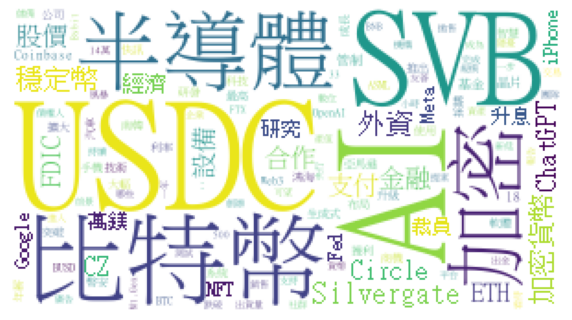

In [16]:
from PIL import Image # PIL：影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

mask = np.array(Image.open("black_rectangle.png")) # 想呈現的圖案形狀
font = "C:\Windows\Fonts\mingliu.ttc" # 選取想呈現字體的字體路徑

# 把文字變成圖片(文字雲)
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

# 調圖片的大小顯示圖片
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

備份整理過後的資料

In [17]:
# 把 dataframe 的資料寫進 csv.檔，和爬蟲的資料寫到 csv.檔是一樣的
orgdata.to_csv("file_list_textmining.csv", index=False)